# Project 3 : HR project
<h3> Data Analyst internship from Meriskills : Task03 </h3>

<p>Business Problem :<b> Why employees left our company ? or why the rate of attriaion become higher  ? </b></p>
- we have some steps before going to make a model to solve this problem :
<ol>
<li> Data Collection</li>
<li> Data prepare </li>
<li> Explorate Data Analysis and try discovering some patterns </li>
<li> Data Preprocessing before modeling</li>
<li> Machine learning</li>
<li> Evaluating the Model</li>
<li> Testing Model</li>
<li> solutions</li>
</ol> 

<p>Firstly we will import the libraries that i will use it to answer questions</p>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import plotly.express as px

In [382]:
df = pd.read_csv("HR_Employee_Attrition_1.csv" , index_col = False)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<p> <h4>Data Prepare</h4></p>

In [172]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [174]:
df['DailyRate'] = df['DailyRate'].astype(float)
# MonthlyIncome  , MonthlyRate

import re

df['MonthlyIncome'] = df['MonthlyIncome'].astype(str)
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x: re.sub('[^0-9]', '', x)).astype(float)


# df['Monthly_Income'] = df['Monthly_Income'].str.replace('$', '').str.replace(',', '').astype(float)
# df['Monthly_Rate'] = df['Monthly_Rate'].astype(float)

df['MonthlyRate'] = df['MonthlyRate'].astype(str)
df['MonthlyRate'] = df['MonthlyRate'].apply(lambda x: re.sub('[^0-9]', '', x)).astype(float)


In [175]:
 # HERE I try to check the items in each col have the same names or not
for col in df.columns:
    if df[col].dtype == object :
        print(f"{col} : {df[col].unique()}")


Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


In [176]:
# df.describe()
 # HERE I try to check the items in each col have the same names or not
for col in df.columns:
    if df[col].dtype != object :
        print(f"{col} = {df[col].min()} : {df[col].max()}")


Age = 18 : 60
DailyRate = 102.0 : 1499.0
DistanceFromHome = 1 : 29
Education = 1 : 5
EmployeeCount = 1 : 1
EmployeeNumber = 1 : 2068
EnvironmentSatisfaction = 1 : 4
HourlyRate = 30 : 100
JobInvolvement = 1 : 4
JobLevel = 1 : 5
JobSatisfaction = 1 : 4
MonthlyIncome = 1009.0 : 19999.0
MonthlyRate = 2094.0 : 26999.0
NumCompaniesWorked = 0 : 9
PercentSalaryHike = 11 : 25
PerformanceRating = 3 : 4
RelationshipSatisfaction = 1 : 4
StandardHours = 80 : 80
StockOptionLevel = 0 : 3
TotalWorkingYears = 0 : 40
TrainingTimesLastYear = 0 : 6
WorkLifeBalance = 1 : 4
YearsAtCompany = 0 : 40
YearsInCurrentRole = 0 : 18
YearsSinceLastPromotion = 0 : 15
YearsWithCurrManager = 0 : 17


In [177]:
df.duplicated().sum()

0

In [178]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [179]:
df = df.drop(['Over18' , 'EmployeeCount' , 'StandardHours' ] , axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [180]:
# let's see the numeric data Attrition, BusinessTravel 
df_columns = df.drop(['EmployeeNumber','OverTime' , 'MaritalStatus' , 'JobRole' , 'Gender','Department' ,'Attrition' , 'BusinessTravel','EducationField']  , axis = 1)
df_columns.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102.0,1,2,2,94,3,2,4,5993.0,...,3,1,0,8,0,1,6,4,0,5
1,49,279.0,8,1,3,61,2,2,2,5130.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1373.0,2,2,4,92,2,1,3,2090.0,...,3,2,0,7,3,3,0,0,0,0
3,33,1392.0,3,4,4,56,3,1,3,2909.0,...,3,3,0,8,3,3,8,7,3,0
4,27,591.0,2,1,1,40,3,1,2,3468.0,...,3,4,1,6,3,3,2,2,2,2


In [181]:
# we need to know if our dataset is balanced or not so we try to count number of people in each kind of attiration
df['Attrition'].value_counts()
# so our data is Imbalanced , so to make it balanced you need to undersampling and oversampling 
# oversampling : i will try generate data where i will try to increase Yes value to be the same shape of No values
# undersampling : i will go the No Values and try to remove some values to get to 237 value like Yes 
# the third algorithm : is try to combine between these algorithm mean tring making oversampling

No     1233
Yes     237
Name: Attrition, dtype: int64

<p>Now Let's Doing <B>Explorate Data analysis</B> and try to finding soluations for business problems.</p>

<h3>Q1) Find the correlation map between all numeric data ?</h3>

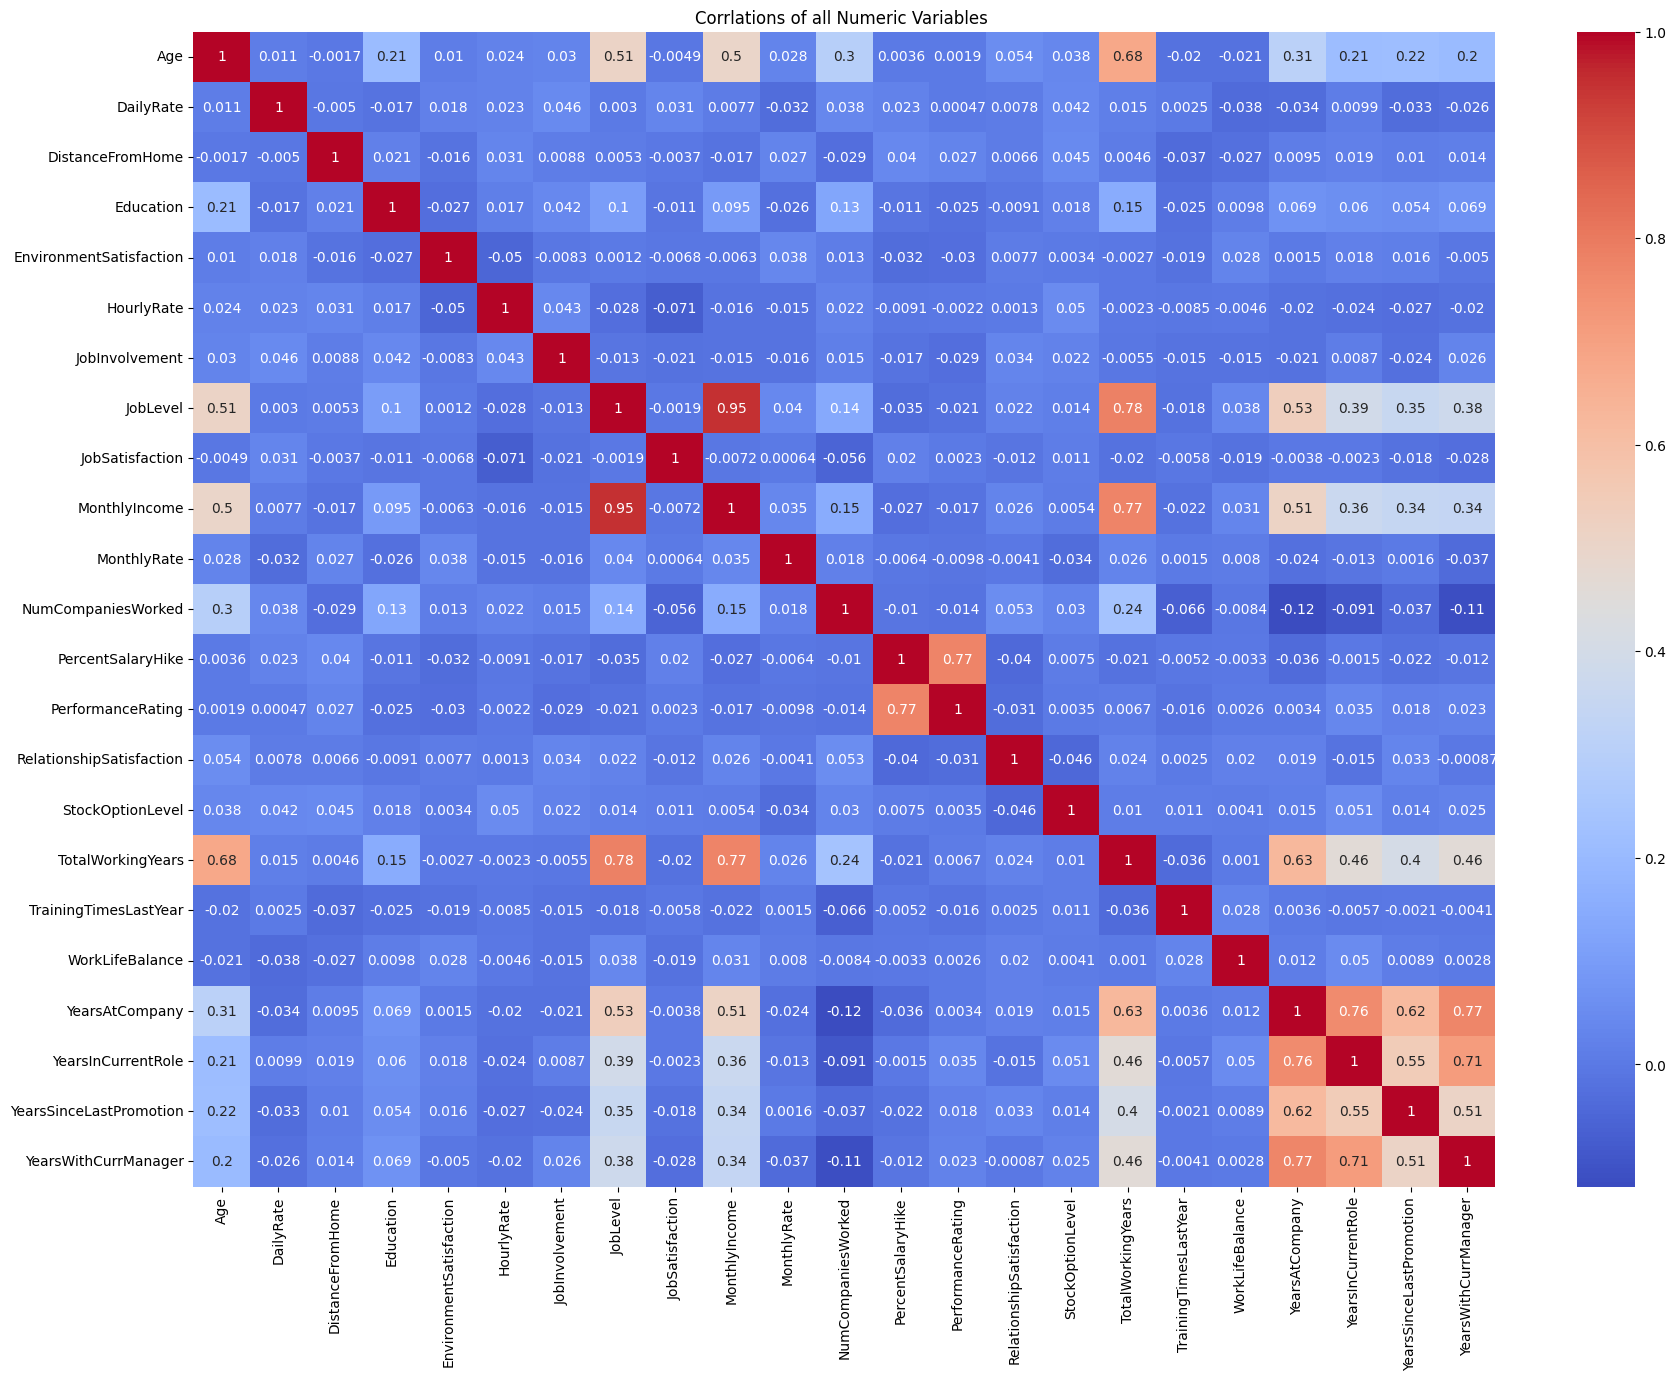

In [182]:
corr_df = df_columns.corr()
plt.figure(figsize = (21,15))
sns.heatmap(corr_df , annot = True , cmap='coolwarm' )
plt.title('Corrlations of all Numeric Variables ')
plt.show()

In [183]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


<h3>Q2) How does the daily rate vary for employees who work overtime compared to those who don't ?</h3>

In [184]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

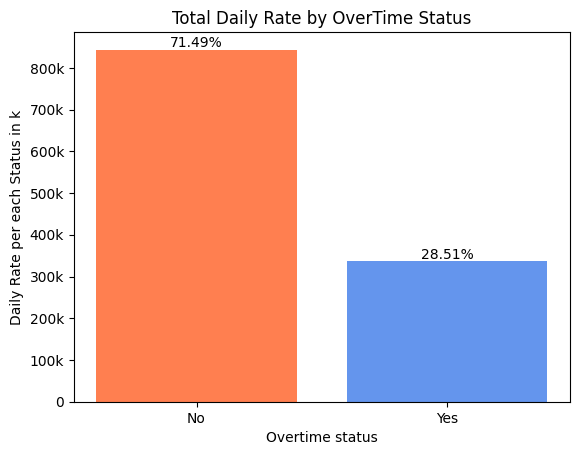

In [185]:
import numpy as np
import matplotlib.pyplot as plt

def format_y_axis(value, tick_number):
    if value >= 1000:
        value /= 1000
        return f"{value:.0f}k"
    else:
        return int(value)

# Your DataFrame and grouping
q2 = df.groupby('OverTime')['DailyRate'].agg(np.sum)
overtime_status = q2.index.tolist()
dailyrate = q2.tolist()

# Calculate percentages
total = sum(dailyrate)
percentages = [(value / total) * 100 for value in dailyrate]

# Plotting the bar chart
fig, ax = plt.subplots()
bars = ax.bar(overtime_status, dailyrate, color=['#FF7F50', '#6495ED'])

# Adding percentage labels on top of the bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

# Set the custom formatting function for the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.xlabel('Overtime status')
plt.ylabel('Daily Rate per each Status in k')
plt.title('Total Daily Rate by OverTime Status')
plt.show()


<h3>Q3) Do married employees tend to have higher or lower salaries compared to their single or divorced counterparts ?</h3>

In [186]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

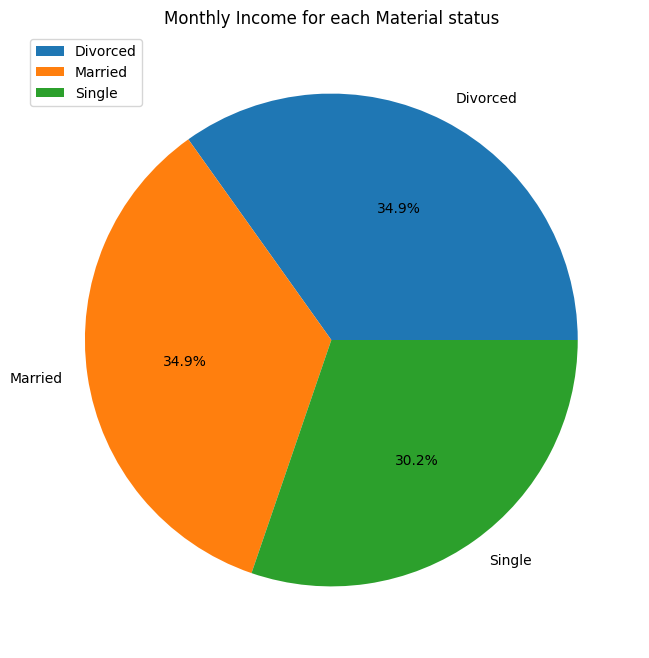

In [187]:
q3 = df.groupby('MaritalStatus')['MonthlyIncome'].mean()
MaritalStatus = q3.index.tolist()
MonthlyIncome = q3.tolist()

plt.figure(figsize=(10,8))
plt.pie(MonthlyIncome, labels=MaritalStatus, autopct='%1.1f%%')
plt.legend()
plt.title('Monthly Income for each Material status')
plt.show()

<h3>Q4) Does the percentage of salary hike differ for employees with Jop roles and different marital statuses ? </h3>

In [188]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

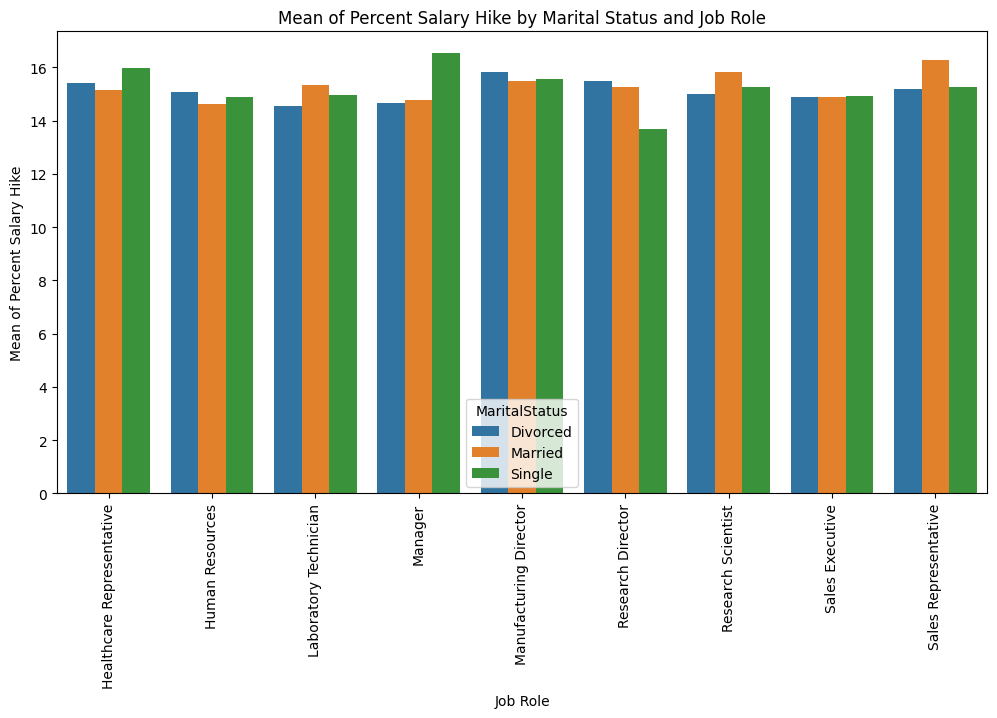

In [189]:

# Group the data by 'MaritalStatus' and 'JobRole' and calculate the sum of 'PercentSalaryHike'
q3 = df.groupby(['MaritalStatus', 'JobRole'])['PercentSalaryHike'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=q3, x='JobRole', y='PercentSalaryHike', hue='MaritalStatus')
plt.xticks(rotation=90)
plt.xlabel('Job Role')
plt.ylabel('Mean of Percent Salary Hike')
plt.title('Mean of Percent Salary Hike by Marital Status and Job Role')

plt.show()

<h3>Q5) How does job satisfaction vary across different job roles ?  </h3>

In [190]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

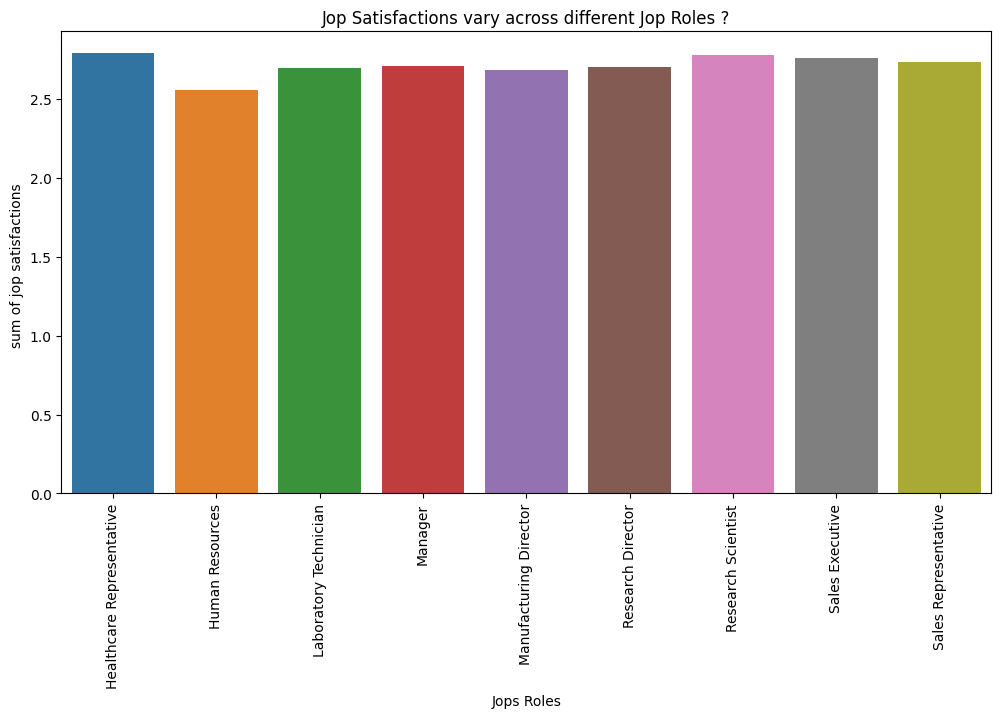

In [191]:
q5 = df.groupby('JobRole')['JobSatisfaction'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=q5, x='JobRole', y='JobSatisfaction')
plt.xticks(rotation = 90)
plt.xlabel('Jops Roles')
plt.ylabel('sum of jop satisfactions ')
plt.title('Jop Satisfactions vary across different Jop Roles ?')
plt.show()

<h3>Q6) Are there are any relation ship between age and monthly income ...?</h3>

In [192]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [193]:
q6_corr =df[['Age' , 'MonthlyIncome']].corr()
q6_corr

,Age,MonthlyIncome
Age,1.000000,0.497855
MonthlyIncome,0.497855,1.000000


<Figure size 1200x600 with 0 Axes>

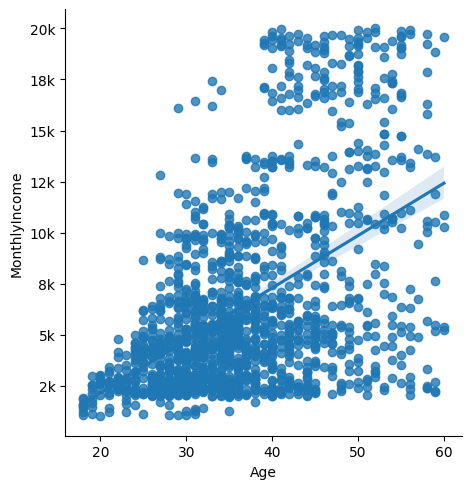

In [194]:

def format_y_axis(value, tick_number):
    if value >= 1000:
        value /= 1000
        return f"{value:.0f}k"
    else:
        return int(value)

# Set the custom formatting function for the y-axis


plt.figure(figsize=(12,6))
sns.lmplot(x='Age' , y='MonthlyIncome' , data=df )
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))
plt.show()

<h3>Q7) What is the salary distribution among different job roles and different Genders?  </h3>

In [195]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

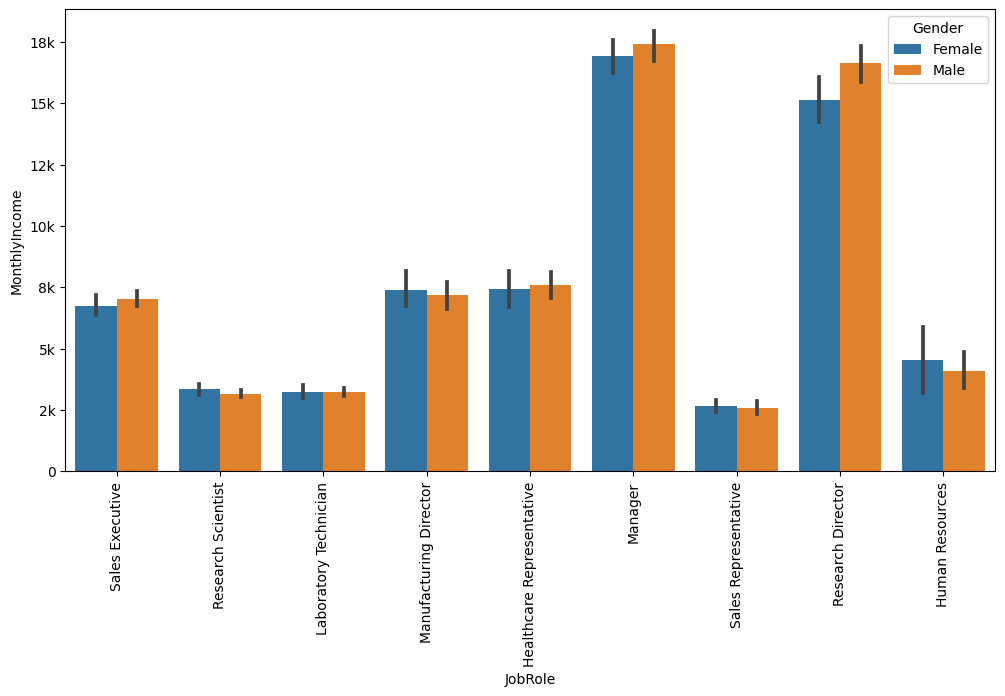

In [196]:

def format_y_axis(value, tick_number):
    if value >= 1000:
        value /= 1000
        return f"{value:.0f}k"
    else:
        return int(value)

plt.figure(figsize=(12,6))
sns.barplot(data=df , x='JobRole' , y='MonthlyIncome' ,hue='Gender')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

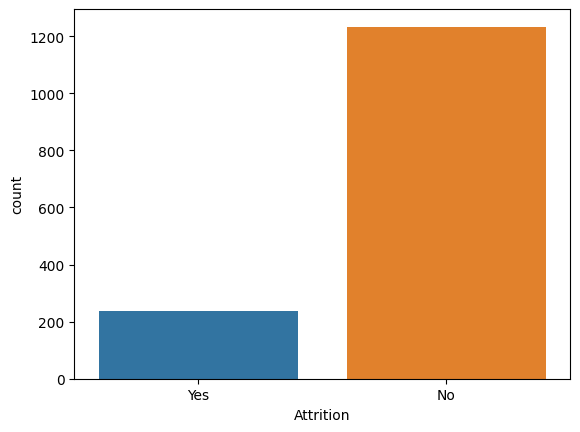

In [197]:
sns.countplot(x=df['Attrition'])

In [198]:
numeric_data = list(df.select_dtypes(include=np.number).columns)
categorical_data =list(df.select_dtypes(include=object).columns)

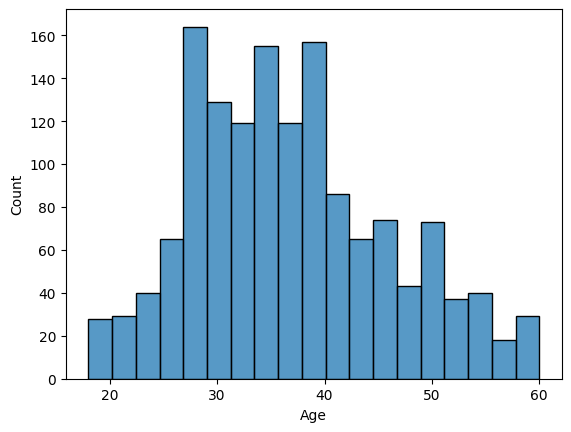

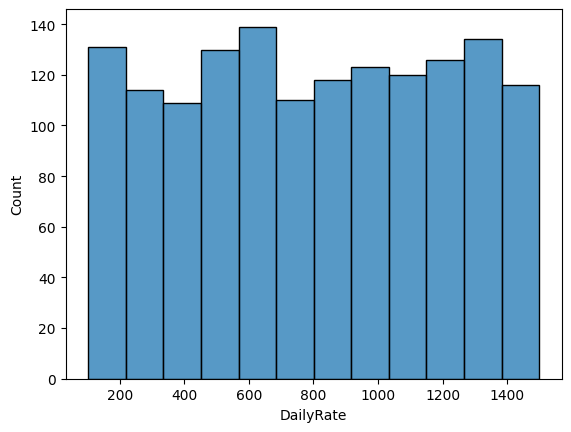

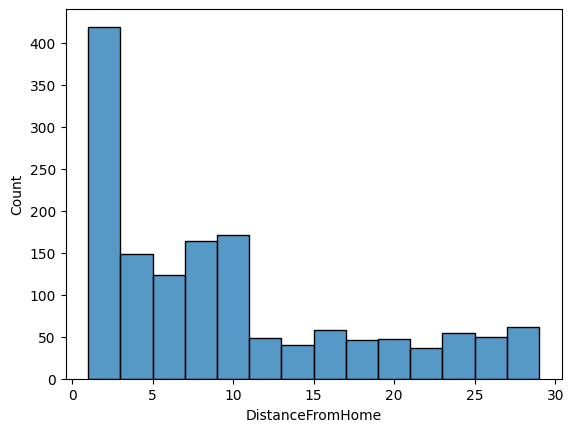

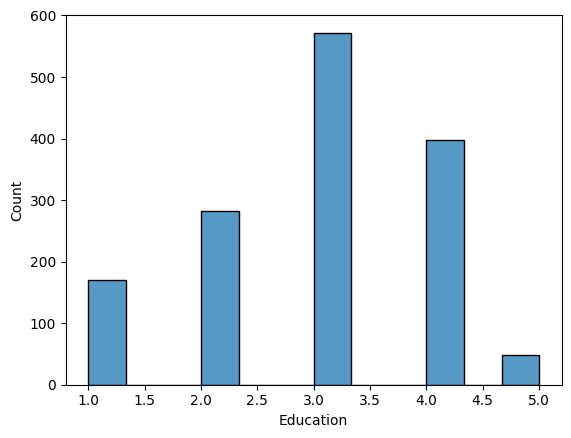

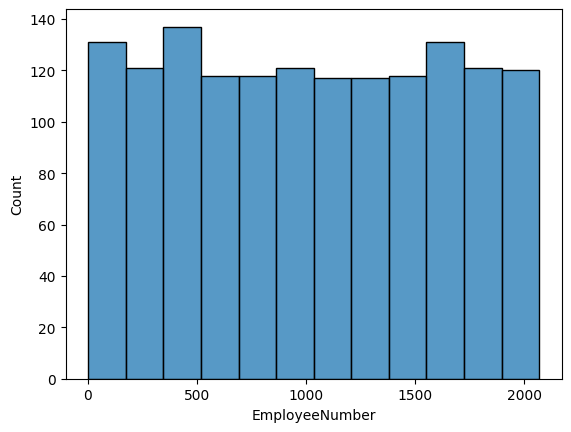

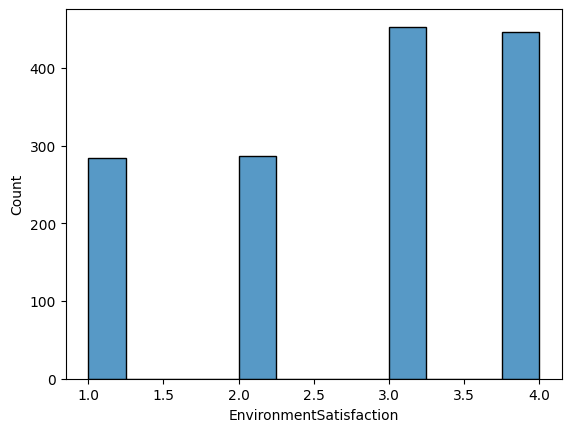

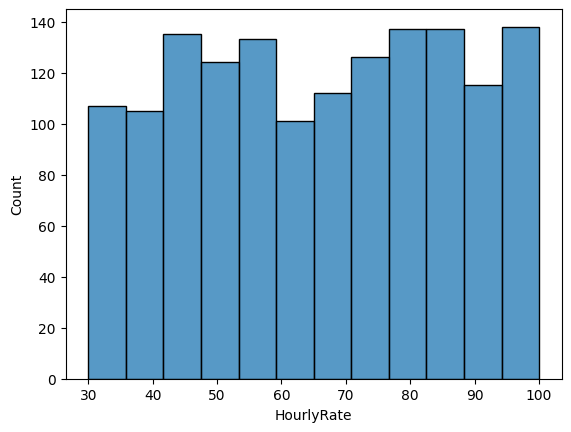

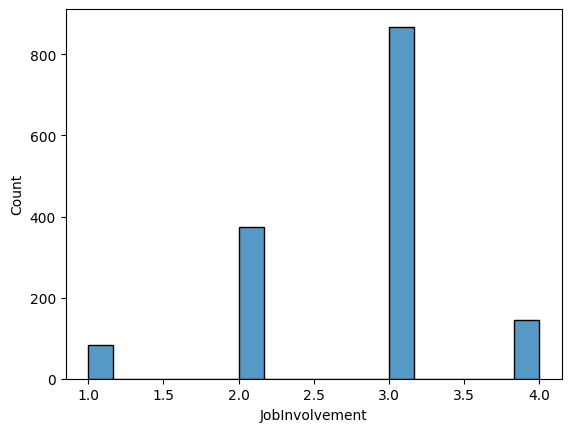

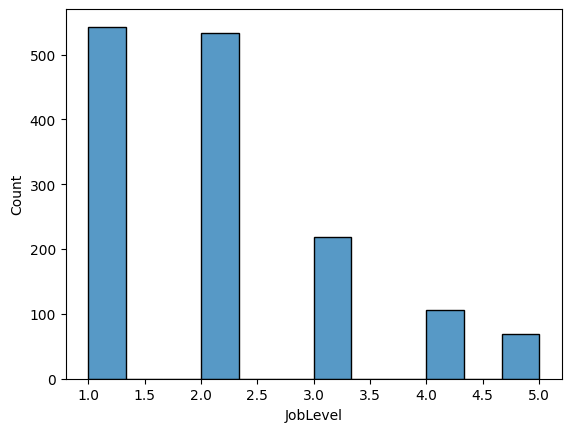

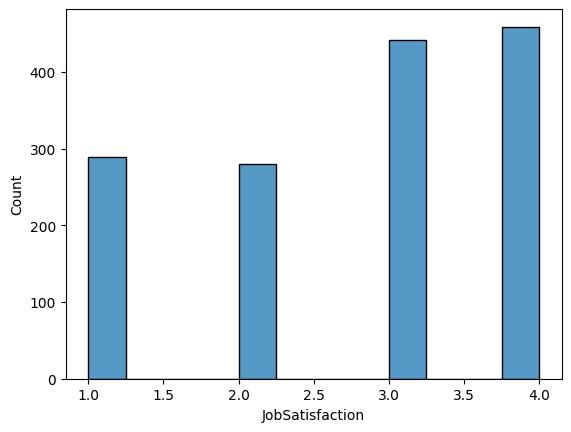

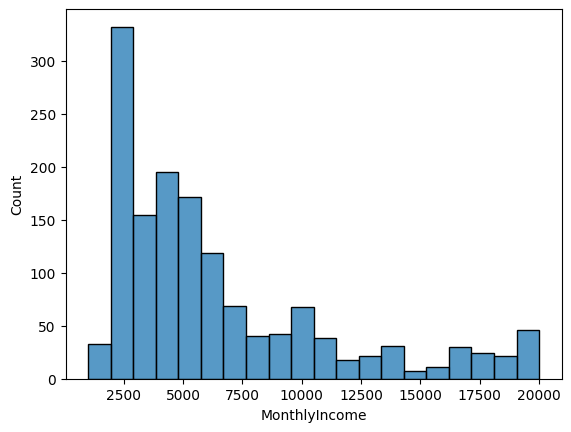

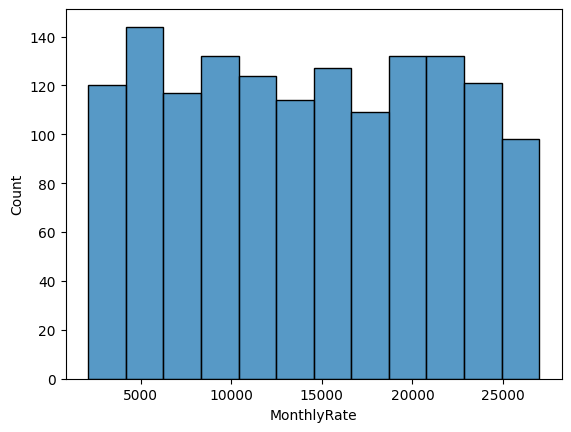

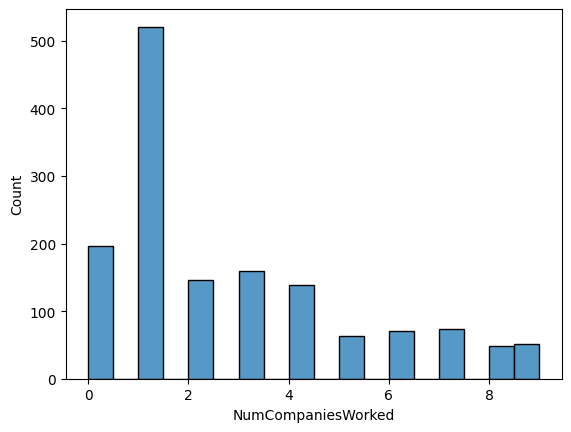

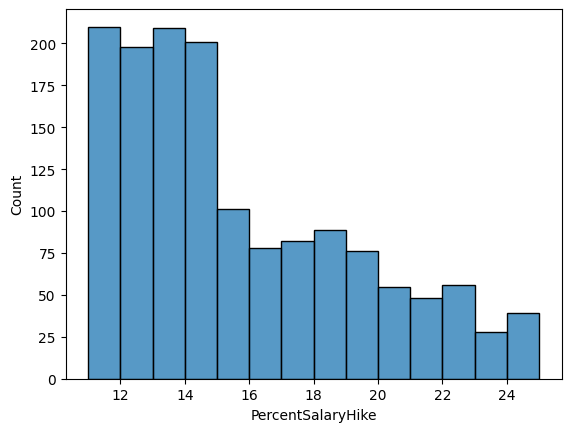

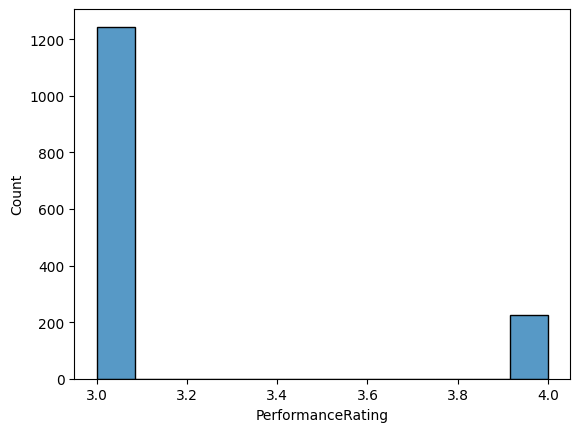

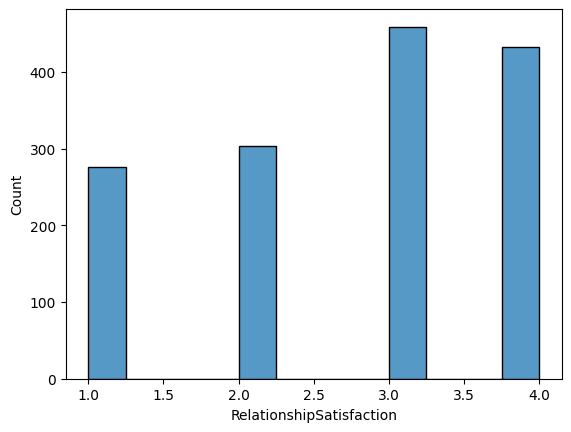

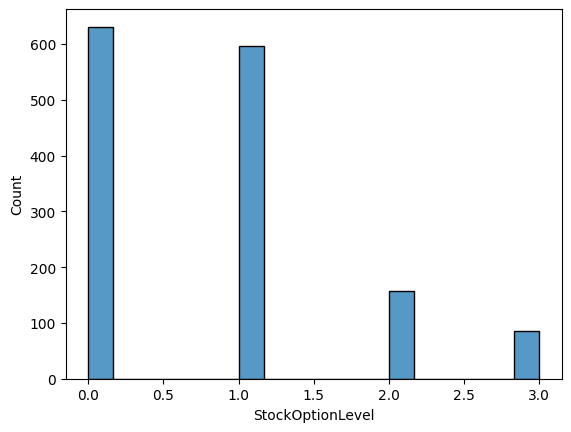

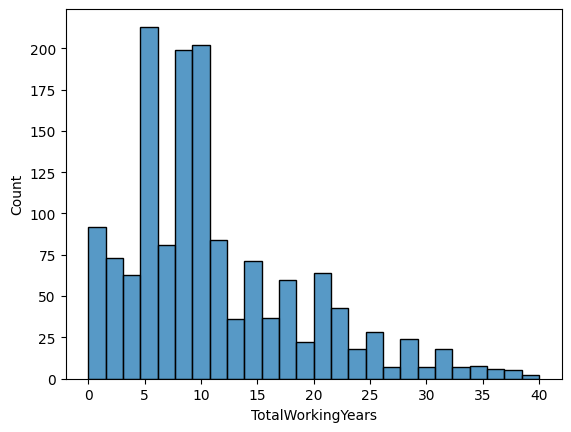

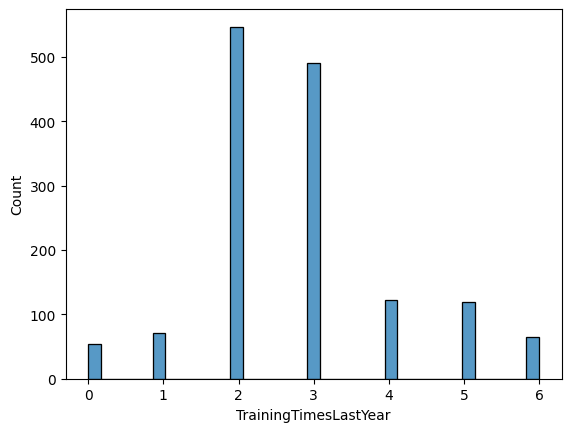

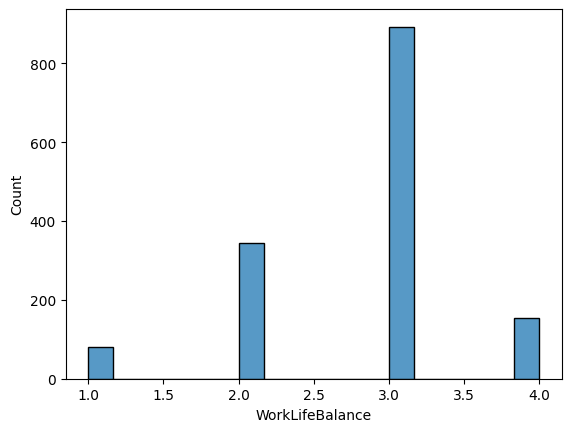

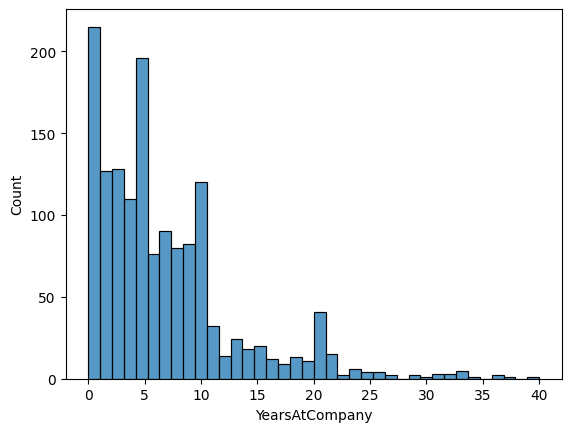

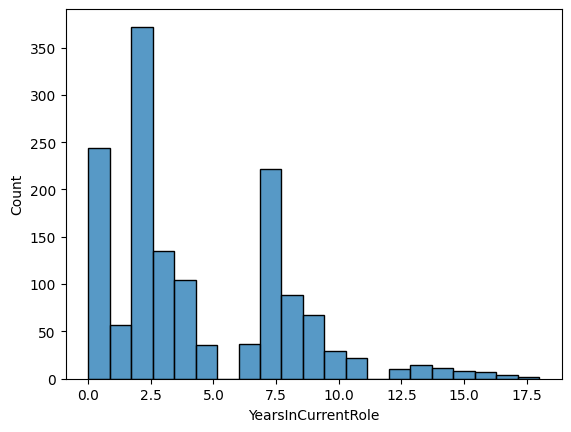

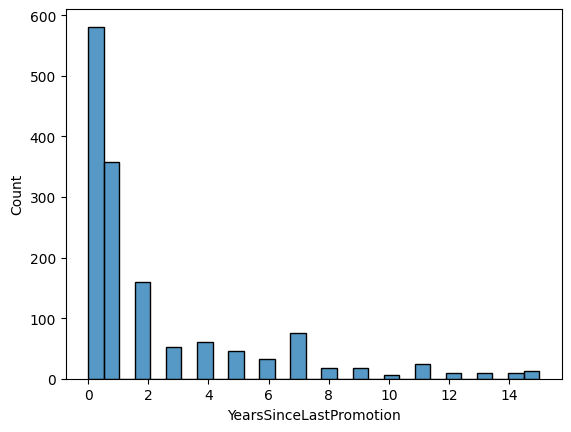

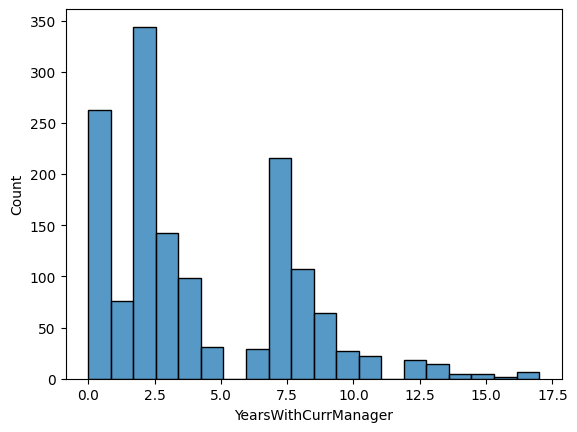

In [199]:
for col in numeric_data :
    sns.histplot(x=col , data=df)
    plt.show()

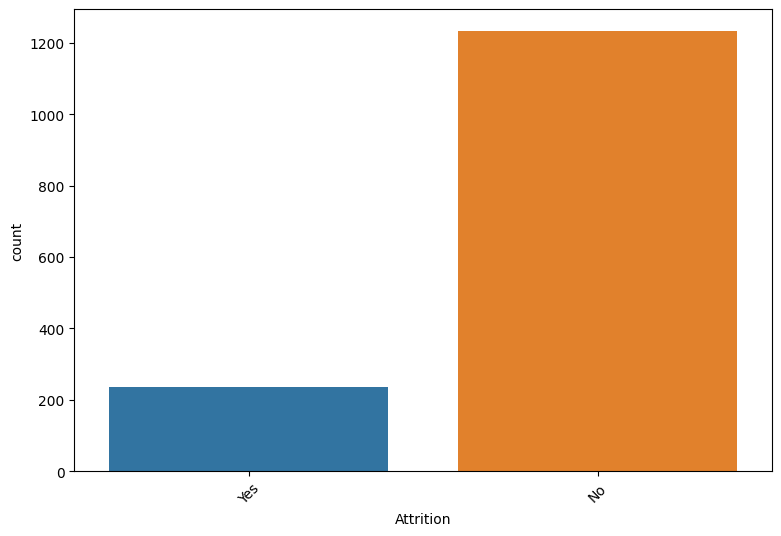

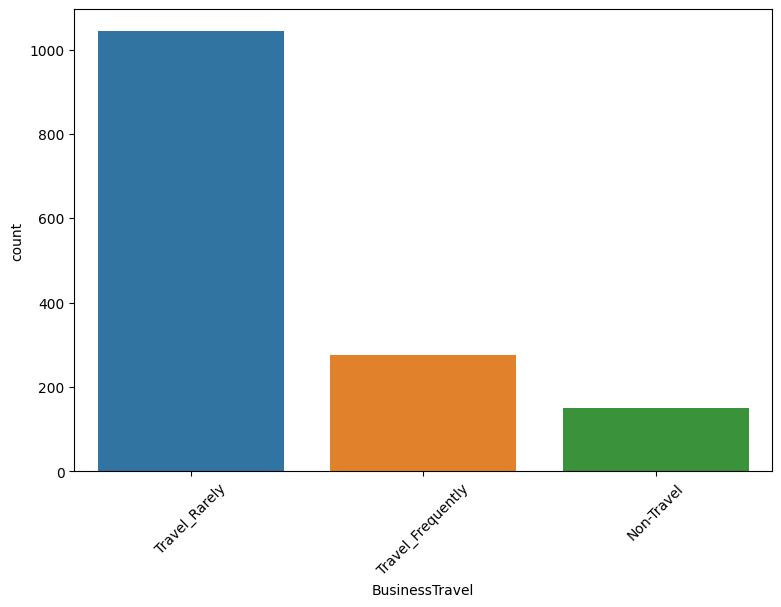

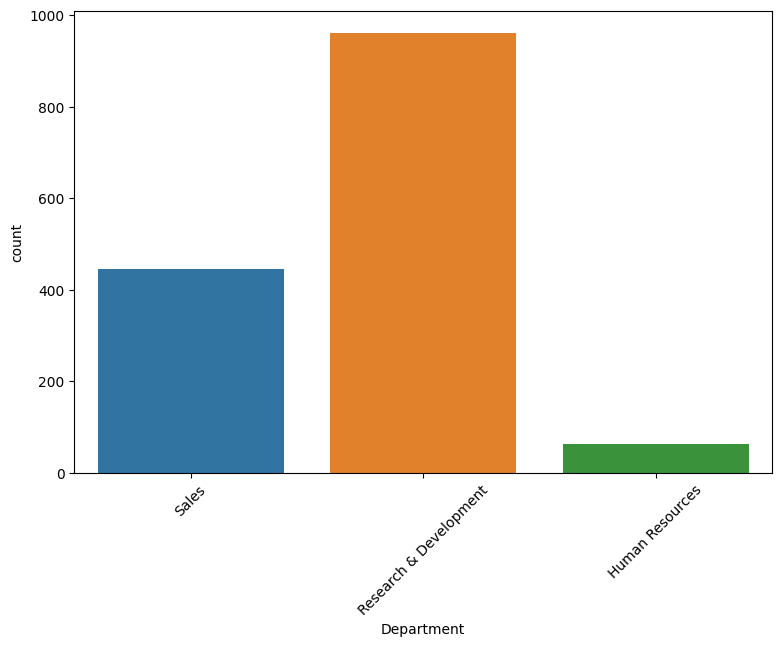

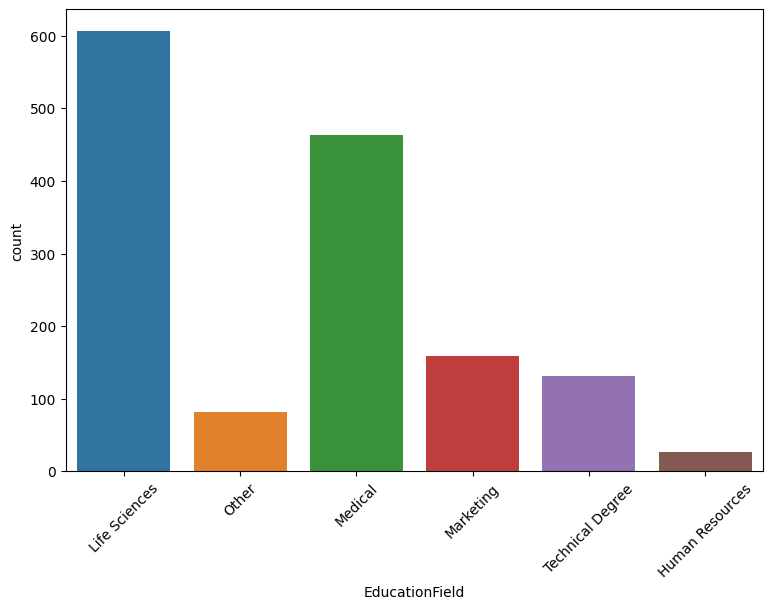

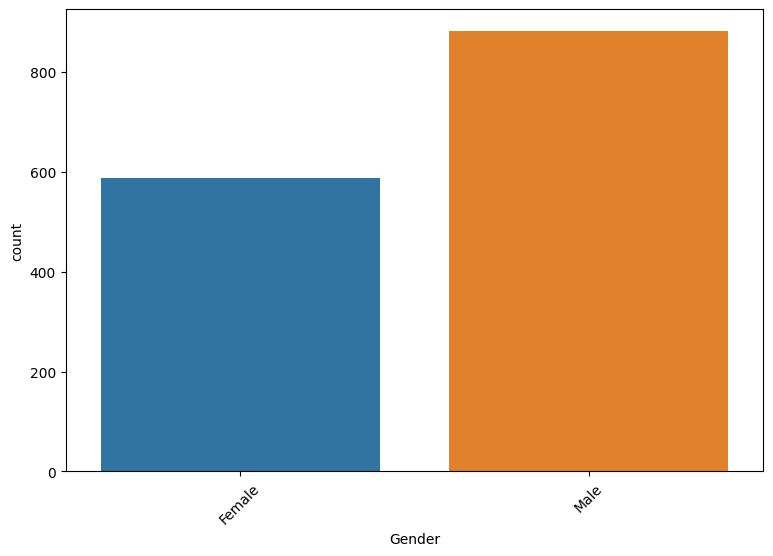

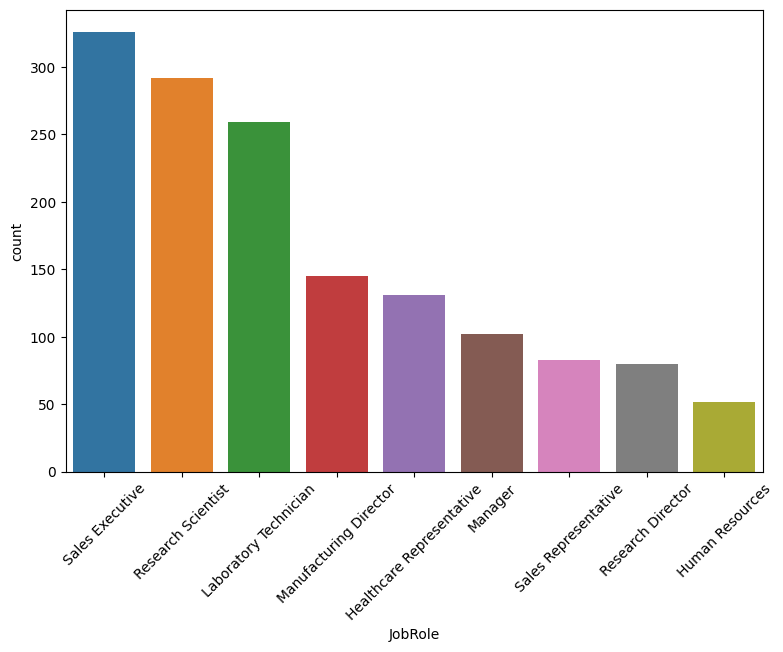

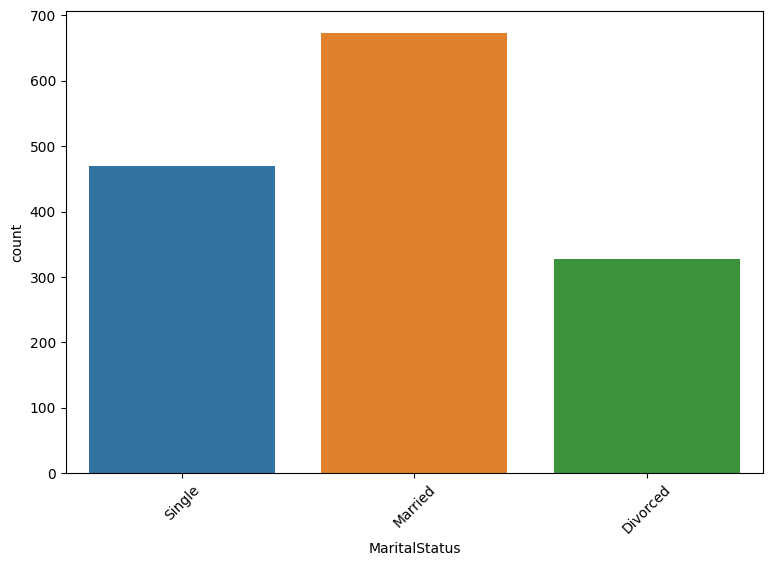

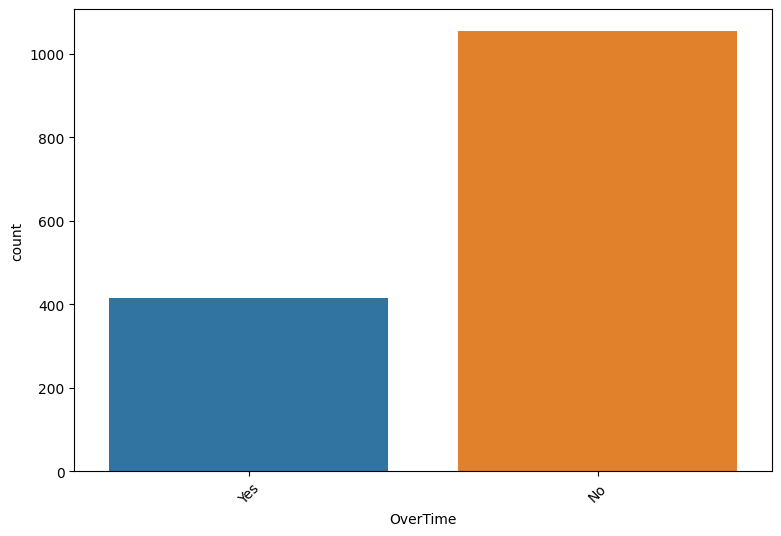

In [200]:
for col in categorical_data :
    plt.figure(figsize=(9,6))
    sns.countplot(x=df[col])
    plt.xticks(rotation = 45)
    plt.show()

In [202]:

df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Machine learning

In [215]:
# lets Make Label Encoding
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
# from imblearn.combine import SMOTEENN

X = df.drop(['Attrition'] ,axis = 1 )
y= df['Attrition']

In [216]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [217]:
X = pd.get_dummies(X , drop_first=True)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102.0,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279.0,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373.0,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392.0,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591.0,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


# Now Let's Make Data balanced by using Random Oversampling 

In [372]:
# our data is not balanced so we need to solutions to make it balanced


# Assuming 'X' is your feature matrix and 'y' is the target variable


# Apply SMOTE-ENN
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled_train, y_resampled_train = ros.fit_resample(X, y)

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled_train, y_resampled_train = smote.fit_resample(X, y)   /////////////////////////

# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=42)
# X_resampled_train, y_resampled_train= adasyn.fit_resample(X, y)   /////////////////////////

# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# X_resampled_train, y_resampled_train = rus.fit_resample(X, y)

# Now, X_resampled and y_resampled are the balanced datasets


X_train, X_test, y_train, y_test = train_test_split(X_resampled_train, y_resampled_train,stratify=y_resampled_train, test_size=0.3, random_state=42)



In [373]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_resampled_train) , columns = X_resampled_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test) , columns = X_test.columns)


In [374]:
lr = LogisticRegression()
lr.fit(X_train_scaled , y_resampled_train)
lr.score(X_test_scaled , y_test)

0.8027027027027027

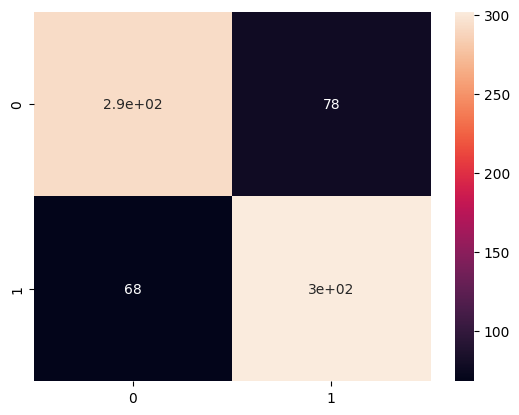

In [360]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
y_pred = lr.predict(X_test_scaled)
sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True)
plt.show()

In [361]:
accuracy_score(y_test,y_pred)

0.8027027027027027

In [362]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       370
           1       0.79      0.82      0.81       370

    accuracy                           0.80       740
   macro avg       0.80      0.80      0.80       740
weighted avg       0.80      0.80      0.80       740



<h2>Now Let's Try choosing the best Features or the importance one by using : RandomForestClassifier</h2>

In [363]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [375]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.05095763, 0.0465637 , 0.03654654, 0.01758906, 0.04553524,
       0.02632134, 0.04059959, 0.01956642, 0.03416808, 0.02325159,
       0.07566762, 0.04094541, 0.03155836, 0.03018915, 0.00431048,
       0.0224697 , 0.04042681, 0.05051808, 0.0218015 , 0.0187954 ,
       0.04498052, 0.02753328, 0.02219872, 0.03360672, 0.01015554,
       0.00633253, 0.01209543, 0.01043135, 0.00527978, 0.00440661,
       0.00965655, 0.00320724, 0.00558253, 0.00852148, 0.00260186,
       0.00585829, 0.00470089, 0.00382553, 0.00236541, 0.00758124,
       0.00964882, 0.00603516, 0.00826421, 0.01500095, 0.05234765])

In [376]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.head(10))  # Displaying the top 10 features, adjust as needed

Top Features:
              Feature  Importance
10      MonthlyIncome    0.075668
44       OverTime_Yes    0.052348
0                 Age    0.050958
17  TotalWorkingYears    0.050518
1           DailyRate    0.046564
4      EmployeeNumber    0.045535
20     YearsAtCompany    0.044981
11        MonthlyRate    0.040945
6          HourlyRate    0.040600
16   StockOptionLevel    0.040427


In [377]:
top_features = feature_importance_df['Feature'][:10].tolist()
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]


In [378]:
# Initialize a new Random Forest model
rf_model_selected = RandomForestClassifier(random_state=42)

# Train the model with selected features
rf_model_selected.fit(X_train_selected, y_resampled_train)


RandomForestClassifier(random_state=42)

In [379]:
# Make predictions on the test set
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate accuracy or other metrics
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy with Selected Features: {accuracy_selected:.2f}")


Accuracy with Selected Features: 1.00


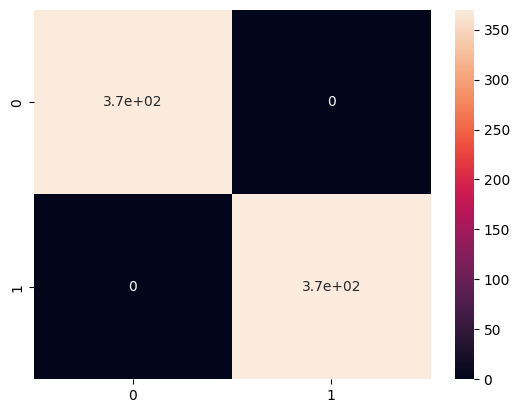

In [369]:

sns.heatmap(confusion_matrix(y_test,y_pred_selected) , annot=True)
plt.show()

In [380]:
print(classification_report(y_test,y_pred_selected))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       370

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740



# Thank You